# Chapter 3: Linear Regression

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

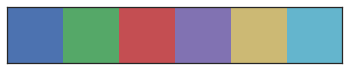

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [4]:
advertising = pd.read_csv('../data/Advertising.csv')
credit = pd.read_csv('../data/Credit.csv')
auto = pd.read_csv('../data/Auto.csv', na_values='?').dropna()

In [5]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [50]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


## 3.1 Simple Linear Regression

### Figure 3.1: Regression plot

Show the linear relationship (via linear regression) of TV and Sales

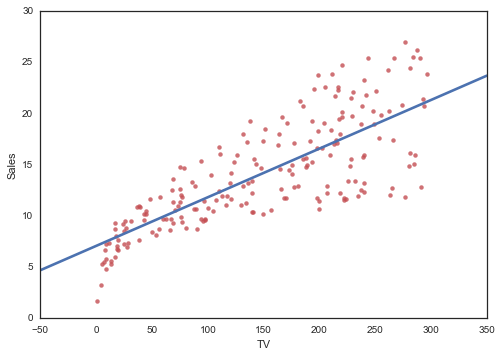

In [7]:
sns.regplot('TV', 'Sales', data=advertising,
            ci=None, scatter_kws={'color': current_palette[2]})

### Figure 3.2: RSS Contour

The residual sum of squares (RSS) is the value that least squares attempts to minimize. These graphs show the plots of the RSS using `sales` and `TV`. The combination of $\beta_{0}$ and $\beta_{1}$ that are the mimimum are shown in red.

In [8]:
lm = sklm.LinearRegression()

In [9]:
X = scale(advertising['TV'], with_std=False).reshape(-1, 1)
y = advertising['Sales'].values

In [10]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print 'intercept:', lm.intercept_, 'coefficients:', lm.coef_

intercept: 14.0225 coefficients: [ 0.04753664]


In [12]:
# Need to set up grids and coordinate plane for graphing the contours
B0 = np.linspace(lm.intercept_ - 2, lm.intercept_ + 2, 50)
B1 = np.linspace(lm.coef_ - 0.02, lm.coef_ + 0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

In [13]:
# Calculate the RSS for each point
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = ((y - (xx[i, j] + X.ravel() * yy[i, j]))**2).sum() / 1000

In [14]:
min_rss = np.sum((lm.intercept_ + lm.coef_ * X - y.reshape(-1, 1))**2) / 1000
print 'minimum RSS is', min_rss

minimum RSS is 2.10253058313


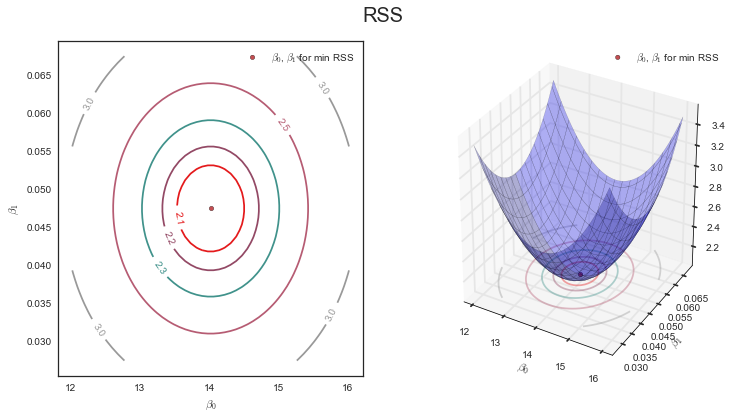

In [15]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('RSS', fontsize=20)

lvs_list = [2.15, 2.2, 2.3, 2.5, 3]
min_rss_label = r'$\beta_0$, $\beta_1$ for min RSS'

ax1 = fig.add_subplot(1, 2, 1)
cs = ax1.contour(xx, yy, Z, levels=lvs_list, cmap=plt.cm.Set1)
ax1.clabel(cs, inline=True, fmt='%1.1f', fontsize=10)
ax1.scatter(lm.intercept_, lm.coef_[0], c=current_palette[2], label=min_rss_label)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=lvs_list)
ax2.scatter3D(lm.intercept_, lm.coef_[0], min_rss, c=current_palette[2],
              label=min_rss_label)

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.legend()

### Table 3.1: Regression Results

In [16]:
# Since sklearn doesn't support many statistical features, we use statsmodels
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


### Table 3.2: Regression Results

In [17]:
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Mon, 02 May 2016",Prob (F-statistic):,1.47e-42
Time:,20:43:14,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [18]:
RSS = np.sum((advertising['Sales'] - est.predict())**2)
RSE = np.sqrt(( 1 / est.df_resid ) * RSS )
print RSE

3.25865636865


## 3.2 Multiple Linear Regression

### Table 3.3: Regression Results

In [19]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,9.3116,0.563,16.542,0.000,8.202 10.422
Radio,0.2025,0.020,9.921,0.000,0.162 0.243


In [20]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,12.3514,0.621,19.876,0.000,11.126 13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022 0.087


### Table 3.4: Multiple Regression

In [21]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,2.9389,0.312,9.422,0.000,2.324 3.554
TV,0.0458,0.001,32.809,0.000,0.043 0.049
Radio,0.1885,0.009,21.893,0.000,0.172 0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013 0.011


### Table 3.5: Correlation Matrix

In [22]:
advertising[['Sales', 'TV', 'Radio', 'Newspaper']].corr()

,Sales,TV,Radio,Newspaper
Sales,1.000000,0.782224,0.576223,0.228299
TV,0.782224,1.000000,0.054809,0.056648
Radio,0.576223,0.054809,1.000000,0.354104
Newspaper,0.228299,0.056648,0.354104,1.000000


### Table 3.6: Multiple Regression

In [23]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Mon, 02 May 2016",Prob (F-statistic):,1.58e-96
Time:,20:43:14,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


In [24]:
RSS = np.sum((advertising['Sales'] - est.predict())**2)
RSE = np.sqrt(( 1 / est.df_resid ) * RSS )
print RSE

1.68551037341


### Figure 3.4: Regression plot with multiple predictors

In [25]:
X = advertising[['Radio', 'TV']].as_matrix()
y = advertising['Sales'].values

In [26]:
lm = sklm.LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print 'intercept:', lm.intercept_, 'coefficients:', lm.coef_

intercept: 2.92109991241 coefficients: [ 0.18799423  0.04575482]


### Figure 3.4: Multiple Regression

In [28]:
radio = np.arange(0, (advertising['Radio'].max() + 9) // 10 * 10)
tv = np.arange(0, (advertising['TV'].max() + 9) // 10 * 10)

B1, B2 = np.meshgrid(radio, tv, indexing='xy')
Z = np.zeros((tv.size, radio.size))

for (i, j), v in np.ndenumerate(Z):
    Z[i , j] = lm.intercept_ + B1[i, j] * lm.coef_[0] + B2[i, j] * lm.coef_[1]

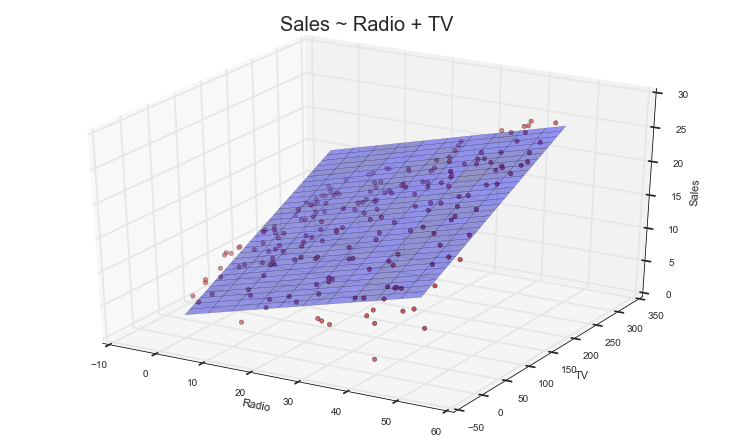

In [29]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Sales ~ Radio + TV', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising['Radio'], advertising['TV'], advertising['Sales'],
             c=current_palette[2])

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')

### Figure 3.5: Multiple Regression

This angle of the graph shows the non linearity in the predictor.

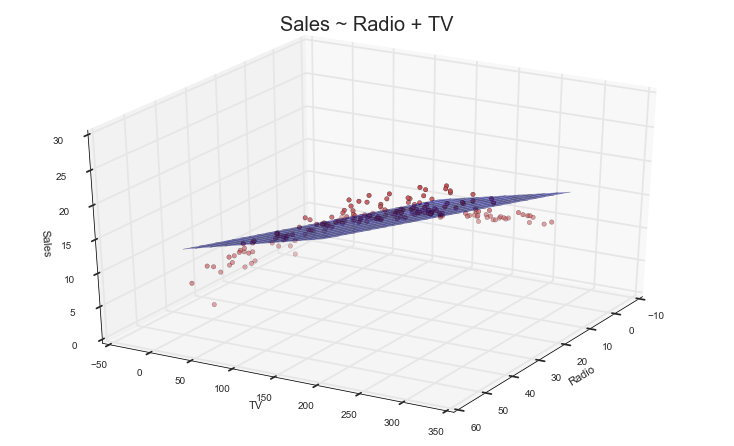

In [49]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Sales ~ Radio + TV', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising['Radio'], advertising['TV'], advertising['Sales'],
             c=current_palette[2])

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')

ax.view_init(30, 30)

## 3.3 Other Considerations in the Regression Model

### Figure 3.6: Pair Plots

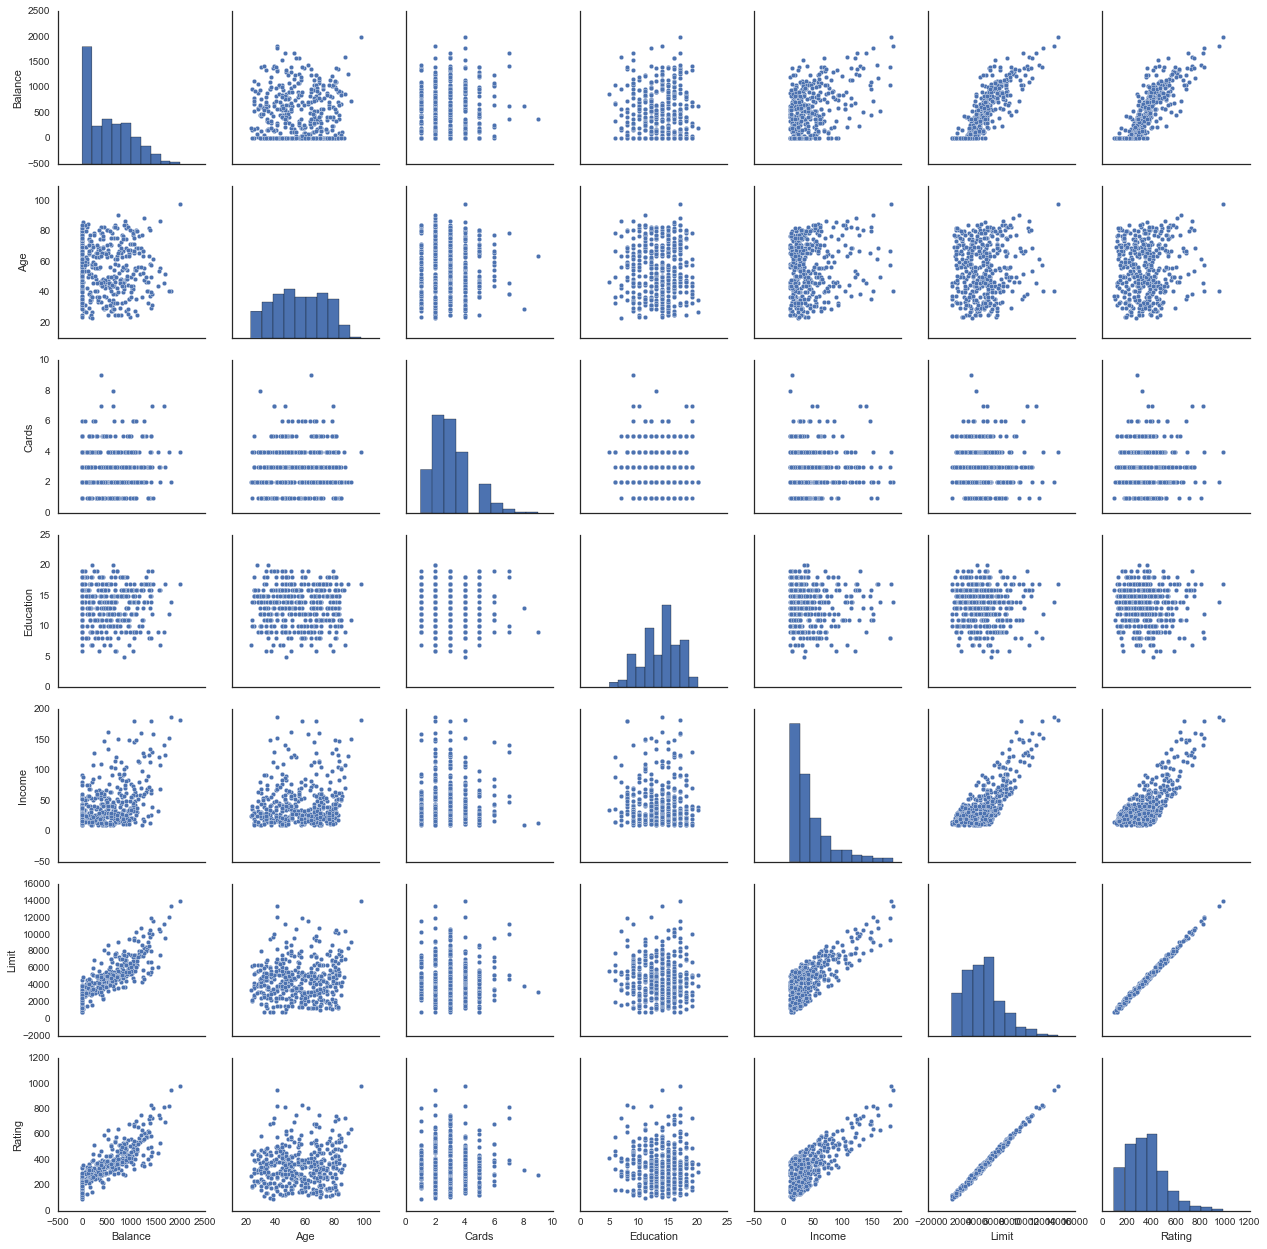

In [31]:
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']])

### Table 3.7: Regression with dummy variable

In [32]:
credit = pd.concat((credit, pd.get_dummies(credit['Gender'])), axis=1)

In [33]:
est = smf.ols('Balance ~ Female', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,509.8031,33.128,15.389,0.000,444.675 574.931
Female,19.7331,46.051,0.429,0.669,-70.801 110.267


### Table 3.8: Multiple Regression with dummy variables

In [34]:
credit = pd.concat((credit, pd.get_dummies(credit['Ethnicity'])), axis=1)

In [35]:
est = smf.ols('Balance ~ Asian + Caucasian', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,531.0000,46.319,11.464,0.000,439.939 622.061
Asian,-18.6863,65.021,-0.287,0.774,-146.515 109.142
Caucasian,-12.5025,56.681,-0.221,0.826,-123.935 98.930


### Table 3.9: Regression with interaction term

In [36]:
est = smf.ols('Sales ~ TV * Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,6.7502,0.248,27.233,0.000,6.261 7.239
TV,0.0191,0.002,12.699,0.000,0.016 0.022
Radio,0.0289,0.009,3.241,0.001,0.011 0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001 0.001


### Figure 3.7: Regression with interaction

In [37]:
credit['StudentMap'] = credit['Student'].map({'Yes': 1, 'No': 0})

In [38]:
est1 = smf.ols('Balance ~ Income + StudentMap', credit).fit()
est2 = smf.ols('Balance ~ Income * StudentMap', credit).fit()

p1 = est1.params
p2 = est2.params

print p1
print p2

Intercept     211.142964
Income          5.984336
StudentMap    382.670539
dtype: float64
Intercept            200.623153
Income                 6.218169
StudentMap           476.675843
Income:StudentMap     -1.999151
dtype: float64


In [39]:
income = np.linspace(0, 150)

# without interactions
noninter_student = np.linspace(p1['Intercept'] + p1['StudentMap'],
                               p1['Intercept'] + p1['StudentMap'] + 150 * p1['Income'])
noninter_nonstudent = np.linspace(p1['Intercept'], p1['Intercept'] + 150 * p1['Income'])

# with interaction
inter_student = np.linspace(p2['Intercept'] + p2['StudentMap'],
                            p2['Intercept'] + p2['StudentMap'] + \
                            150 * (p2['Income'] +  p2['Income:StudentMap']))
inter_nonstudent = np.linspace(p2['Intercept'], p2['Intercept'] + 150 * p2['Income'])

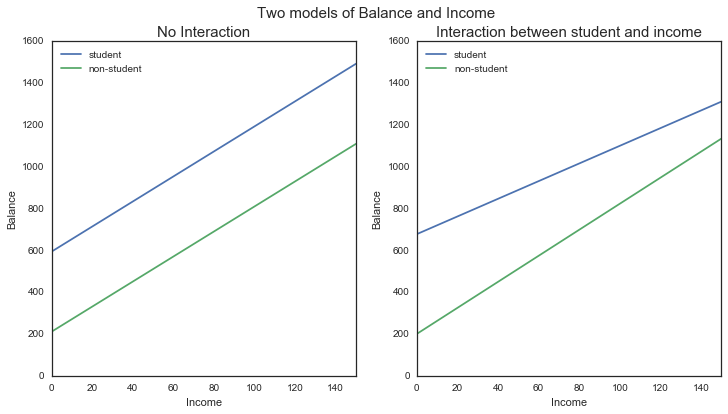

In [40]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Two models of Balance and Income', fontsize=15)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('No Interaction', fontsize=15)
ax2.set_title('Interaction between student and income', fontsize=15)

ax1.plot(income, noninter_student)
ax1.plot(income, noninter_nonstudent)

ax2.plot(income, inter_student)
ax2.plot(income, inter_nonstudent)


for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc='upper left')
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(0, 1600)
    ax.set_xlim(0, 150)

### Figure 3.8: Polynomial Regression

In [41]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(40, 250)

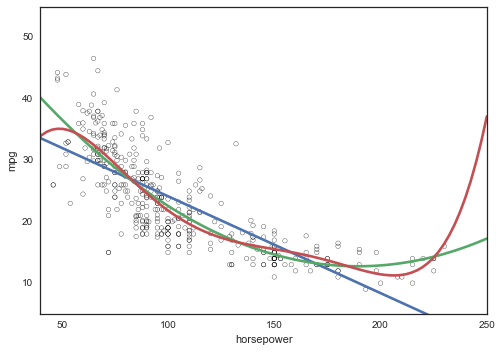

In [42]:
plt.scatter(auto['horsepower'], auto['mpg'], facecolors='None', edgecolor='k')
sns.regplot('horsepower', 'mpg', auto, ci=None, scatter=False)
sns.regplot('horsepower', 'mpg', auto, ci=None, scatter=False, order=2)
sns.regplot('horsepower', 'mpg', auto, ci=None, scatter=False, order=5)
plt.ylim(5, 55)
plt.xlim(40, 250)

### Table 3.10: Polynomial regression

In [43]:
auto['horsepower2'] = auto['horsepower'] * auto['horsepower']
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()

In [44]:
print est.summary().tables[1]

                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000        53.360    60.440
horsepower     -0.4662      0.031    -14.978      0.000        -0.527    -0.405
horsepower2     0.0012      0.000     10.080      0.000         0.001     0.001


### Figure 3.9: Residual Plots (seaborn style)

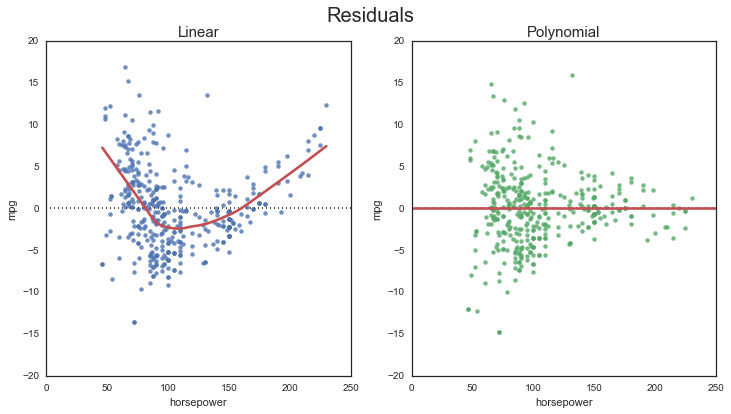

In [45]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Residuals', fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Linear', fontsize=15)
ax2.set_title('Polynomial', fontsize=15)

sns.residplot('horsepower', 'mpg', auto, lowess=True, ax=ax1,
              line_kws={'color': current_palette[2]})
sns.residplot('horsepower', 'mpg', auto, lowess=True, order=2, ax=ax2,
              line_kws={'color': current_palette[2]})

### Figure 3.9: Residual Plots (ISLR style)

In [46]:
lm = sklm.LinearRegression()

X = auto['horsepower'].reshape(-1, 1)
y = auto['mpg'].values
lm.fit(X, y)

auto_fit = auto.copy()
auto_fit['pred_lin'] = lm.predict(X)
auto_fit['resid_lin'] = auto_fit['mpg'] - auto_fit['pred_lin']

X_poly = auto[['horsepower', 'horsepower2']].as_matrix()
lm.fit(X_poly, y)

auto_fit['pred_poly'] = lm.predict(X_poly)
auto_fit['resid_poly'] = auto_fit['mpg'] - auto_fit['pred_poly']

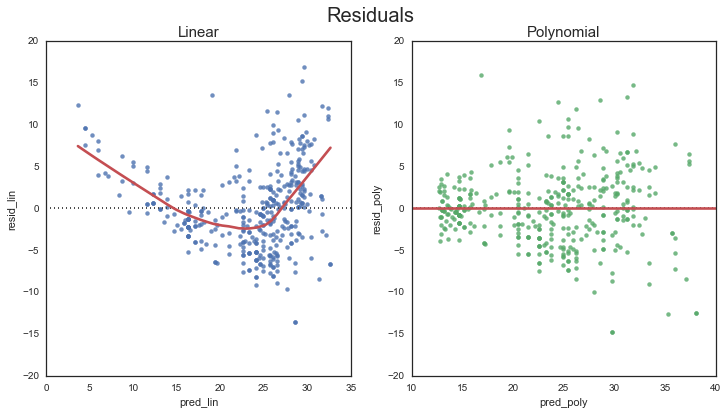

In [47]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Residuals', fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Linear', fontsize=15)
ax2.set_title('Polynomial', fontsize=15)

sns.residplot('pred_lin', 'resid_lin', auto_fit, lowess=True, ax=ax1,
              line_kws={'color': current_palette[2]})
sns.residplot('pred_poly', 'resid_poly', auto_fit, lowess=True, order=2, ax=ax2,
              line_kws={'color': current_palette[2]})

### Figure 3.10: Time Series Residual Plot

Need to simulate an appropriate data set

### Figure 3.11: Residual Plots (Transformed Variables)

Need to simulate an appropriate data set

### Figure 3.12: Outlier and Studentized Residual

Need to simulate an appropriate data set

### Figure 3.13: Leverage Points

Need to simulate a data set

### Figure 3.14: Scatterplots

(100, 900)

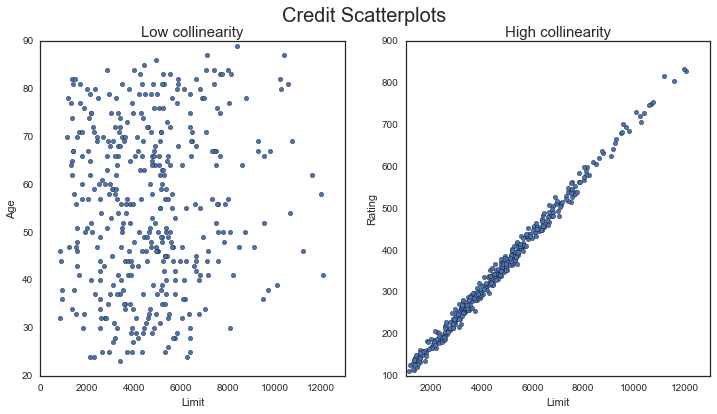

In [48]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Credit Scatterplots', fontsize=20)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Low collinearity', fontsize=15)
ax2.set_title('High collinearity', fontsize=15)

credit.plot('Limit', 'Age', kind='scatter', ax=ax1)
credit.plot('Limit', 'Rating', kind='scatter', ax=ax2)

ax1.set_xlim(0, 13000)
ax1.set_ylim(20, 90)

ax2.set_xlim(1000, 13000)
ax2.set_ylim(100, 900)

## KNN Regressions

Need to find a dataset